# EDA
- Exploratory Data Analysis, 탐색적 데이터 분석 (탐색적 요인 분석)

In [2]:
# !pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# 1. 데이터 로드
df = pd.read_csv('./data/titanic.csv')

In [5]:
# 2. 데이터 구조 및 기초 통계 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 3. 결측치 및 이상치 탐색

# - 결측치 탐색
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

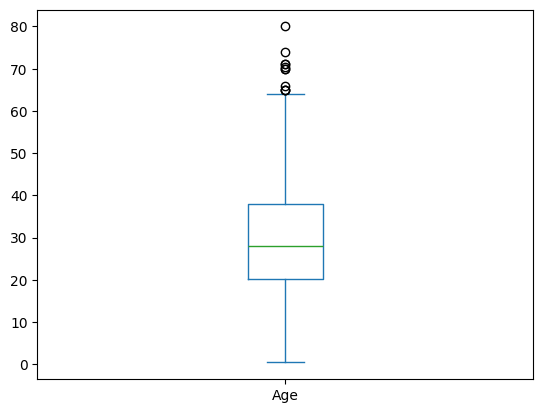

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [10]:
# - 이상치 탐색
df['Age'].plot(kind='box')
plt.show()

df[df['Age'] < 1]

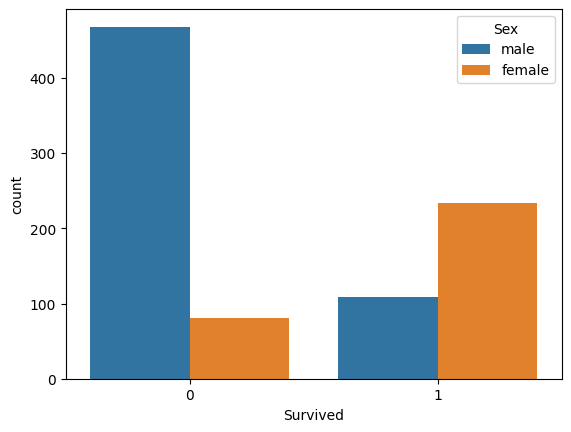

In [11]:
# 4. 데이터 시각화를 통한 탐색
sns.countplot(data=df, x='Survived', hue='Sex')
plt.show()

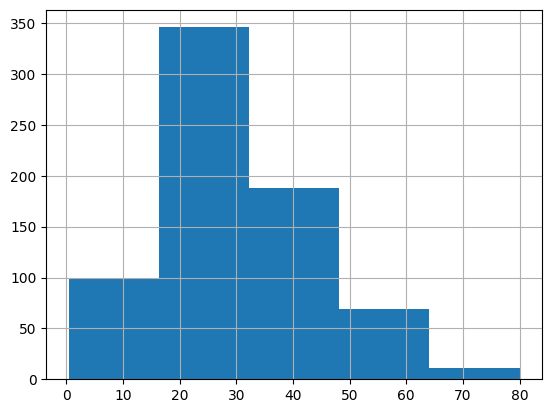

In [12]:
df['Age'].hist(bins=5)
plt.show()

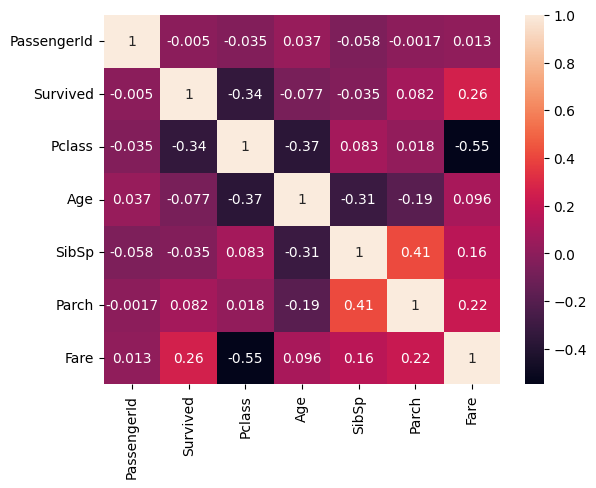

In [14]:
corr_matrix = df.corr(numeric_only=True) # numeric_only=True: 숫자형 데이터대해서만 상관관계를 포현해주겠다는 표시
corr_matrix

sns.heatmap(corr_matrix, annot=True) # 셀의 상관개수 값을 표현
plt.show()

In [15]:
# 5. 데이터 정제 및 전처리
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

np.int64(0)

In [16]:
df = df.drop('Cabin', axis= 1)

In [19]:
df['Family'] = df['SibSp'] + df['Parch']
df= df.drop(['SibSp', 'Parch'], axis=1)
df 

KeyError: 'SibSp'

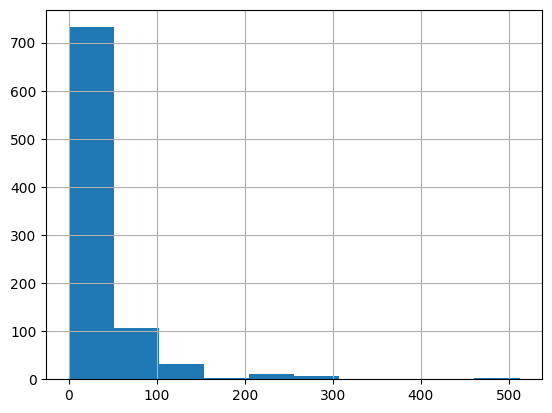

<Axes: >

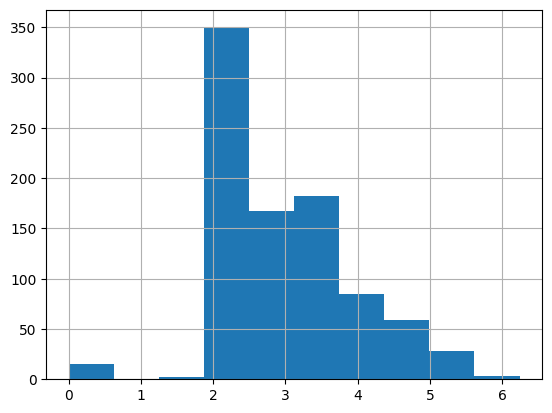

In [21]:
df['Fare'].hist()
plt.show()

df['LogFare'] = df['Fare'].apply(lambda x: np.log1p(x)) # apply(): 콜백함수를 하나하나 다 반영하겠다. # log1p: 로그함수에 1을 더해 취한다
df['LogFare'].hist()


In [22]:
# 성별라벨 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,7.2500,S,1,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,71.2833,C,1,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,7.9250,S,0,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,53.1000,S,1,3.990834
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,373450,8.0500,S,0,2.202765
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,211536,13.0000,S,0,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,112053,30.0000,S,0,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,W./C. 6607,23.4500,S,3,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,111369,30.0000,C,0,3.433987


In [24]:
# 7. 데이터 분할
from sklearn.model_selection import train_test_split

x_data = df.drop('Survived', axis=1)
y_data = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
